In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Step 1: Exploring and Understanding the DataSet

In [2]:
df = pd.read_csv('/Users/lluisarull/Desktop/DSDM/Machine_Learning/Assignment_5/retail_data - retail_data.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4211
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Analysing UnitPrice variable

In [6]:
# Cases in which price < 0:
df[df.UnitPrice<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom


We can see that in these two cases, the UnitPrice is negative in order to adjust bad debt. We are going to eliminate these two rows since this is not relevant for our analysis

In [7]:
# Cases in which price = 0:
df[df.UnitPrice==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,08-12-2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,08-12-2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,08-12-2011 14:06,0.0,NaN,United Kingdom


We are also going to drop those cases where price = 0.

In [8]:
#Keeping only positive prices:
df_1 = df[df.UnitPrice >0]
df_1.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,406789.000000
mean,9.845904,4.673648,15287.795830
std,215.412652,94.614722,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Analysing Quantity variable

In [9]:
# Cases in which quantity < 0 and price > 0 (already filtered):
df_1[df_1.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


We are not going to elimante these observations since they have a relevant weight in the total amount of the variable distribution. We are going to check them further on once we group by Customer ID. That way we will be able to check if there is any customer with a negative quantity. 

### Defining Functions and important vars

In [10]:
def check_outliers(df, categorical_and_binary_vars):
  """It gets the df and a list of variables that dont have outliers (categorical
  and binary vars) and returns a dictionary with the total number of outliers
  and the index of them for each var that HAS outliers
  """
  outliers = dict()
  for column in df.columns:
    if column in categorical_and_binary_vars:
      continue
    else:
      q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)

      IQR = q75 - q25
      lower,upper = q25 - IQR*1.5, q75 + IQR*1.5
      outliers_index = ((df[column] < lower) | (df[column] > upper))

      if len(outliers_index == True) == 0:
        continue
      else:
        output = {
            "indexes" : outliers_index,
            "quantity" : outliers_index.sum(axis = 0)
        }
        outliers[column] = output
  return outliers

def outliers_printer(df, vars_list):
  i=1
  plt.figure(figsize = (20,10))
  for col in vars_list:
   
    plt.subplot(3,3,i)
    sns.boxplot(df[col])

    i=i+1

def careful_standardization(df, not_standardize_list):
  """ This function receives the DataFrame and a list of variables not to standardize
  (for example the target, binary variables, or dummy variables(categorical vars
  should have been dummified). Also can receive sub strings of dummified categorical vars.
  For example, neigborhoodcode when dummified turns into neigborhoodcode_1, neigborhoodcode_2...
  so by putting the string 'neigborhoodcode_' inside the list no dummy of 'neigborhoodcode_' will
  be standardized). The output is the same DataFrame with all the other columns standardized. 
  """
  standardize_vars_cols = []
  dummy_vars_and_y = []

  for column in df.columns:
    for element in not_standardize_list:
    
      if element in column:
        save = False
        break
      else:
        save = True

    if save:
      standardize_vars_cols.append(column)
    else:
      dummy_vars_and_y.append(column)

  # scaler
  scaler = StandardScaler().fit(df[standardize_vars_cols])
  scaled_features = scaler.transform(df[standardize_vars_cols])
  df_scaled = pd.DataFrame(scaled_features, index = df.index, columns = df[standardize_vars_cols].columns)
  df_scaled[dummy_vars_and_y] = df[dummy_vars_and_y]

  return df_scaled


def CV_model(X , y, kf, model, metric, the_greater_the_better = True):
  """This function gets X and y sets, the KFold object to split the data, the model
  to evaluate, the metric to evaluate the model and an argument to set if the metric has to 
  be big or small (r2 the bigger the better, mse the smaller the better)"""
  metrics_list = []
  
  if the_greater_the_better:
    best_metric = 0
  
  if not the_greater_the_better:
    best_metric = 1000
  
  for train_index, test_index in kf.split(X):

    X_train, X_test = np.matrix(X)[train_index], np.matrix(X)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    metric_val = metric(y_test, y_pred)
    metrics_list.append(metric_val)

    if the_greater_the_better:

      if metric_val > best_metric:
        
        final_model = model
        final_X_test = X_test
        final_y_pred = y_pred
        final_y_test = y_test
        best_metric = metric_val
    else:

      if metric_val < best_metric:
        
        final_model = model
        final_X_test = X_test
        final_y_pred = y_pred
        final_y_test = y_test
        best_metric = metric_val

  return final_model, final_X_test, final_y_test, final_y_pred, np.mean(metrics_list)

## Step 2: Data Cleansing

In [11]:
df_1.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
dtype: int64

### Filling NaNs in CustomerId

Subset of data containing CustomerID as NaN values:

In [13]:
df_1.loc[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,01-12-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09-12-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09-12-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09-12-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09-12-2011 10:26,10.79,NaN,United Kingdom


As we can see, there are 132.603 observations with NaN in customer ID. We are going to fill the NaNs in customer ID using the Propagate Last Valid Observation Method (pad)

In [14]:
df_1['CustomerID'].fillna(method ='pad',inplace=True) 

/Users/lluisarull/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Step 3: Data Preparation (RFM)

We are going group customers based on the recency, frequency and monetary total of their recent transactions 

### RECENCY

In [15]:
# Convert InvoiceDate to proper datatype
df_2 = df_1.copy()
df_2['InvoiceDate'] = pd.to_datetime(df_2['InvoiceDate'],format='%d-%m-%Y %H:%M')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539392 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539392 non-null  object        
 1   StockCode    539392 non-null  object        
 2   Description  539392 non-null  object        
 3   Quantity     539392 non-null  int64         
 4   InvoiceDate  539392 non-null  datetime64[ns]
 5   UnitPrice    539392 non-null  float64       
 6   CustomerID   539392 non-null  float64       
 7   Country      539392 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.0+ MB


In [16]:
# Compute the maximum date to know the last transaction date
max_date = max(df_2['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

We will consider the last transaction date as the reference point when measuring the recency of customers.

In [17]:
# Compute the difference between the last transaction date (maximum date) and the transaction date to get the recency of each transaction
df_2['Diff'] = max_date - df_2['InvoiceDate']
df_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00


In [18]:
# Obtaining the recency of each customer
recency_df = df_2.groupby('CustomerID')['Diff'].min().reset_index()
recency_df['Diff'] = recency_df['Diff'].dt.days
recency_df.rename(columns = {'Diff':'Recency'}, inplace = True)
recency_df

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4366,18280.0,277
4367,18281.0,180
4368,18282.0,7
4369,18283.0,3


### FRECUENCY

In [19]:
frecuency_df = df_2.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frecuency_df.rename(columns = {'InvoiceNo':'Frecuency'}, inplace = True)
frecuency_df

,CustomerID,Frecuency
0,12346.0,2
1,12347.0,182
2,12348.0,206
3,12349.0,73
4,12350.0,17
...,...,...
4366,18280.0,325
4367,18281.0,7
4368,18282.0,13
4369,18283.0,756


### MONETARY

In [20]:
df_2['MonetaryAmount'] = df_2['Quantity']*df_2['UnitPrice']
monetary_df = df_2.groupby('CustomerID')['MonetaryAmount'].mean().reset_index()
monetary_df

,CustomerID,MonetaryAmount
0,12346.0,0.000000
1,12347.0,23.681319
2,12348.0,16.341117
3,12349.0,24.076027
4,12350.0,19.670588
...,...,...
4366,18280.0,25.632523
4367,18281.0,11.545714
4368,18282.0,13.584615
4369,18283.0,2.771005


We are finally going to merge the three data frame is one, in order to have these three attributes together grouped by each customer.

In [21]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(pd.merge(recency_df,frecuency_df,on='CustomerID'),monetary_df,on='CustomerID')
rfm

,CustomerID,Recency,Frecuency,MonetaryAmount
0,12346.0,325,2,0.000000
1,12347.0,1,182,23.681319
2,12348.0,74,206,16.341117
3,12349.0,18,73,24.076027
4,12350.0,309,17,19.670588
...,...,...,...,...
4366,18280.0,277,325,25.632523
4367,18281.0,180,7,11.545714
4368,18282.0,7,13,13.584615
4369,18283.0,3,756,2.771005


In [22]:
rfm['Recency'].mean()

91.06451612903226

### Checking for Outliers

Text(0.5, 0, 'Attributes')

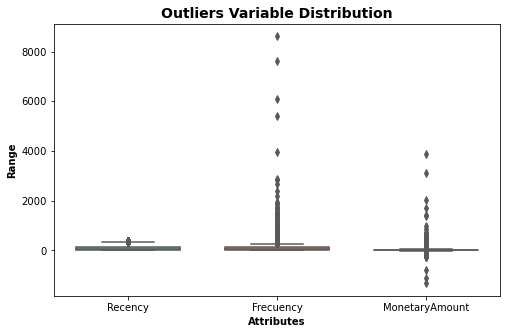

In [23]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Recency','Frecuency','MonetaryAmount']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [24]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
seed(1)

# calculate summary statistics for each of the variables
recency_mean, recency_std = rfm['Recency'].mean(), rfm['Recency'].std()
frecuency_mean, frecuency_std = rfm['Frecuency'].mean(), rfm['Frecuency'].std()
monam_mean, monam_std = rfm['MonetaryAmount'].mean(), rfm['MonetaryAmount'].std()

# identify outliers
# RECENCY
cut_off_rec = recency_std * 3
lower_r, upper_r = recency_mean - cut_off_rec, recency_mean + cut_off_rec

# FRECUENCY
cut_off_frec = frecuency_std * 3
lower_f, upper_f = frecuency_mean - cut_off_frec, frecuency_mean + cut_off_frec

# MONETARY AMOUNT
cut_off_monam = monam_std * 3
lower_m, upper_m = monam_mean - cut_off_monam, monam_mean + cut_off_monam

# identify outliers
outliers_rec = [x for x in rfm['Recency'] if x < lower_r or x > upper_r]
print('Identified outliers in Recency: %d' % len(outliers_rec))

outliers_frec = [x for x in rfm['Frecuency'] if x < lower_f or x > upper_f]
print('Identified outliers in Frecuency: %d' % len(outliers_frec))

outliers_monam = [x for x in rfm['MonetaryAmount'] if x < lower_m or x > upper_m]
print('Identified outliers in Moneteary Amount: %d' % len(outliers_monam))

Identified outliers in Recency: 0
Identified outliers in Frecuency: 45
Identified outliers in Moneteary Amount: 38


In [25]:
# remove outliers from Frecuency
rfm_clean = rfm[~((rfm['Frecuency'] < lower_f) |(rfm['Frecuency'] > upper_f))]
rfm_clean

,CustomerID,Recency,Frecuency,MonetaryAmount
0,12346.0,325,2,0.000000
1,12347.0,1,182,23.681319
2,12348.0,74,206,16.341117
3,12349.0,18,73,24.076027
4,12350.0,309,17,19.670588
...,...,...,...,...
4366,18280.0,277,325,25.632523
4367,18281.0,180,7,11.545714
4368,18282.0,7,13,13.584615
4369,18283.0,3,756,2.771005


In [26]:
# remove outliers from Monetary Amount
rfm_clean2 = rfm_clean[~((rfm_clean['MonetaryAmount'] < lower_m) |(rfm_clean['MonetaryAmount'] > upper_m))]
rfm_clean2

,CustomerID,Recency,Frecuency,MonetaryAmount
0,12346.0,325,2,0.000000
1,12347.0,1,182,23.681319
2,12348.0,74,206,16.341117
3,12349.0,18,73,24.076027
4,12350.0,309,17,19.670588
...,...,...,...,...
4366,18280.0,277,325,25.632523
4367,18281.0,180,7,11.545714
4368,18282.0,7,13,13.584615
4369,18283.0,3,756,2.771005


In [30]:
#remove 0 to take logs
rfm_clean3 = rfm_clean2.loc[~(rfm_clean2==0).all(axis=1)]
rfm_clean3 

,CustomerID,Recency,Frecuency,MonetaryAmount
0,12346.0,325,2,0.000000
1,12347.0,1,182,23.681319
2,12348.0,74,206,16.341117
3,12349.0,18,73,24.076027
4,12350.0,309,17,19.670588
...,...,...,...,...
4366,18280.0,277,325,25.632523
4367,18281.0,180,7,11.545714
4368,18282.0,7,13,13.584615
4369,18283.0,3,756,2.771005


In [31]:
# Taking Log of columns
rfm_clean3["log_R"] = np.log(rfm.Recency)
rfm_clean3["log_F"] = np.log(rfm.Frecuency)
rfm_clean3["log_M"] = np.log(rfm.MonetaryAmount)

/Users/lluisarull/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lluisarull/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
rfm_clean2

,CustomerID,Recency,Frecuency,MonetaryAmount,log_R,log_F,log_M
0,12346.0,325,2,0.000000,5.783825,0.693147,-inf
1,12347.0,1,182,23.681319,0.000000,5.204007,3.164686
2,12348.0,74,206,16.341117,4.304065,5.327876,2.793684
3,12349.0,18,73,24.076027,2.890372,4.290459,3.181217
4,12350.0,309,17,19.670588,5.733341,2.833213,2.979125
...,...,...,...,...,...,...,...
4366,18280.0,277,325,25.632523,5.624018,5.783825,3.243862
4367,18281.0,180,7,11.545714,5.192957,1.945910,2.446314
4368,18282.0,7,13,13.584615,1.945910,2.564949,2.608938
4369,18283.0,3,756,2.771005,1.098612,6.628041,1.019210


### Attributes Standardization

We will use the standardization method (mean = 0 and sigma = 1) in order to rescale our variables so that they have a comparable scale.

In [36]:
not_standardize_list = ['CustomerID']
rfm_scaled = careful_standardization(rfm_clean2, not_standardize_list)
rfm_scaled

,Recency,Frecuency,MonetaryAmount,CustomerID
0,2.320813,-0.667723,-0.677902,12346.0
1,-0.901165,0.509360,0.038516,12347.0
2,-0.175226,0.666305,-0.183543,12348.0
3,-0.732111,-0.203429,0.050457,12349.0
4,2.161703,-0.569633,-0.082819,12350.0
...,...,...,...,...
4366,1.843483,1.444488,0.097545,18280.0
4367,0.878878,-0.635026,-0.328616,18281.0
4368,-0.841499,-0.595790,-0.266934,18282.0
4369,-0.881276,4.262949,-0.594073,18283.0


## Step 4: Assess The Number of Clusters

In [44]:
from sklearn.datasets import make_blobs
# create simulated clusters using scikit learn's make_blobs
rfm_scaled, true_cluster = make_blobs(n_samples=500, 
                              centers=3,
                              random_state=0, 
                              cluster_std=0.8)
rfm_scaled['true_cluster'] = true_cluster
rfm_scaled.head(n=3)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [42]:
from sklearn.cluster import KMeans

rfm_scaled2 = rfm_scaled.copy()

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(rfm_scaled2[['Recency', 'Frecuency','MonetaryAmount']])

rfm_scaled2['pred_cluster'] = kmeanModel.predict(rfm_scaled2[['Recency', 'Frecuency','MonetaryAmount']])
rfm_scaled2

,Recency,Frecuency,MonetaryAmount,CustomerID,pred_cluster
0,2.320813,-0.667723,-0.677902,12346.0,2
1,-0.901165,0.509360,0.038516,12347.0,0
2,-0.175226,0.666305,-0.183543,12348.0,0
3,-0.732111,-0.203429,0.050457,12349.0,0
4,2.161703,-0.569633,-0.082819,12350.0,2
...,...,...,...,...,...
4366,1.843483,1.444488,0.097545,18280.0,2
4367,0.878878,-0.635026,-0.328616,18281.0,2
4368,-0.841499,-0.595790,-0.266934,18282.0,0
4369,-0.881276,4.262949,-0.594073,18283.0,1


KeyError: 'true_cluster'

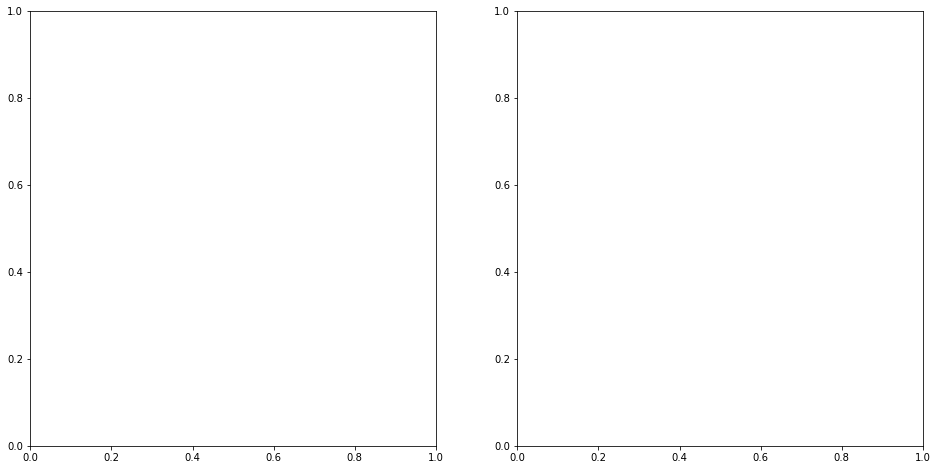

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(rfm_scaled2['Recency'], rfm_scaled2['Frecuency'],rfm_scaled2['MonetaryAmount'], c=rfm_scaled2['true_cluster'])
axes[1].scatter(rfm_scaled2['Recency'], rfm_scaled2['Frecuency'],rfm_scaled2['MonetaryAmount'], c=rfm_scaled2['pred_cluster'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)